# US Baby Name

## GIỚI THIỆU
Dữ Liệu `US_BaBy_Names.csv` chứa thông tin của các em bé sinh từ 2004 - 2014 tại Mỹ. Dựa vào tập dữ liệu trên, bạn hãy thực hiện các bài tập sau:

## TÌM HIỂU DỮ LIỆU

### 01. Đọc dữ liệu

In [12]:
import pandas as pd
df = pd.read_csv('US_BaBy_Names.csv')

### 02. Hiển thị 10 dòng dữ liệu bất kỳ

In [8]:
df.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


### 03. Cho biết kích thước dữ liệu

In [9]:
df.shape

(1016395, 7)

### 04. Xóa 2 cột 'Unnamed: 0' and 'Id'

In [13]:
df.drop(columns=['Unnamed: 0', 'Id'], inplace=True)
df

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


### 05. Cho biết số lượng bé trai, bé gái?

In [12]:
df['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

### 06. Trong bộ dữ liệu có bao nhiêu tên khác nhau?

In [14]:
df.groupby(['Name']).size()

Name
Aaban        2
Aadan        4
Aadarsh      1
Aaden      196
Aadhav       1
          ... 
Zyra         7
Zyrah        2
Zyren        1
Zyria       10
Zyriah       9
Length: 17632, dtype: int64

### 07. Tên nào xuất hiện ít nhất?

In [15]:
data = df.groupby(['Name']).size()
data[data == df.groupby(['Name']).size().min()]

Name
Aadarsh       1
Aadhav        1
Aadin         1
Aahna         1
Aaima         1
             ..
Zykeriah      1
Zykierra      1
Zymari        1
Zyquavious    1
Zyren         1
Length: 3682, dtype: int64

### 08. Top 10 tên được sử dụng nhiều nhất?

In [42]:
df.groupby(['Name']).size().sort_values(ascending = False).head(10)

Name
Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Dakota     962
dtype: int64

## TRỰC QUAN DỮ LIỆU

### 09. Vẽ đồ thị top 10 tên xuất hiện nhiều nhất năm 2014

In [49]:
import matplotlib.pyplot as plt
df = pd.read_csv('US_BaBy_Names.csv')

In [66]:
data = df[df['Year'] == 2014].groupby(['Name']).size().sort_values(ascending=False).head(10)

In [71]:
data

Name
Avery      102
Riley      100
Hayden      98
Peyton      96
Parker      95
Jordan      93
Sawyer      91
Rowan       91
Charlie     90
Logan       89
dtype: int64

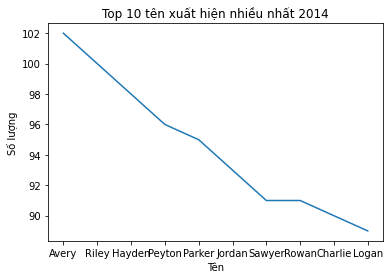

In [85]:
plt.title('Top 10 tên xuất hiện nhiều nhất 2014')
plt.plot(data.index, data.values)
plt.xlabel("Tên")
plt.ylabel("Số lượng")
plt.show()

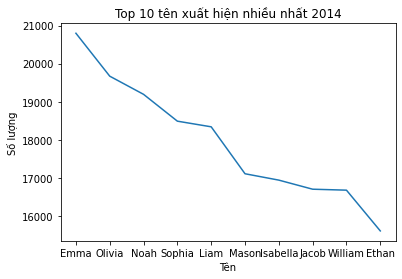

In [100]:
import matplotlib.pyplot as plt
df = pd.read_csv('US_BaBy_Names.csv')
data = df[df['Year'] == 2014][['Name', 'Count']].groupby(['Name']).sum().sort_values(by=['Count'], ascending=False).head(10)

plt.title('Top 10 tên xuất hiện nhiều nhất 2014')
plt.plot(data.index, data.values)
plt.xlabel("Tên")
plt.ylabel("Số lượng")
plt.show()

### 10. Vẽ đồ thị thể hiện tỷ lệ nam nữ qua các năm 2004-2014

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('US_BaBy_Names.csv')

In [60]:
year = df[['Year']].groupby(['Year']).size().keys()

In [61]:
male = df[df['Gender'] == 'M'][['Year', 'Gender', 'Count']].groupby(['Year', 'Gender']).size().values
female = df[df['Gender'] == 'F'][['Year', 'Gender', 'Count']].groupby(['Year', 'Gender']).size().values

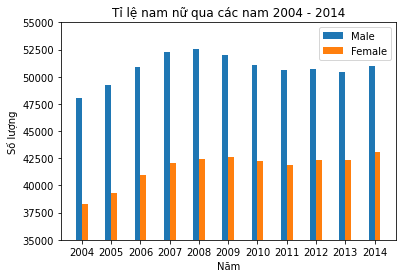

In [62]:
fig, ax = plt.subplots()
ind = np.arange(len(female))  
width = 0.2
rects1 = ax.bar(ind - width/2, female, width, label='Male')
rects2 = ax.bar(ind + width/2, male, width, label='Female')

ax.set_title('Tỉ lệ nam nữ qua các nam 2004 - 2014')
ax.set_ylabel('Số lượng')
ax.set_xlabel('Năm')
ax.set_xticks(ind)
ax.set_xticklabels(year)
ax.legend()
plt.ylim(35000, 55000)  #set vi tri dau cuoi cua truc y
plt.show()